# Машинное обучение, ВМК МГУ

## Практическое задание 3. Метод опорных векторов и логистическая регрессия

### Общая информация

Дата выдачи: 8 ноября 2022

Мягкий дедлайн: 23:30MSK 22 ноября 2022 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:30MSK 29 ноября 2021.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — **10 баллов + 4.8 бонусов**.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. **Не нужно** удалять и видоизменять написанный код и текст, если явно не указана такая возможность. Создавать новые ячейки с кодом/текстов там, где это осмысленно и вы считаете необходимым, конечно, можно. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде/как результат вывода ячейки. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.3 баллов за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

In [1]:
import matplotlib
import matplotlib.pyplot as plt

#отображение графиков в ноутбуке
%matplotlib inline 

#для четкой прорисовки графиков
%config InlineBackend.figure_format = 'svg' 

In [2]:
%pylab inline
import pandas as pd

from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [3]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

In [4]:
X_train.shape

(309, 10)

__Задание 1.__ Обучение линейной регрессии.

**(1 балл)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Выведите  количество коэффициентов (веса, они же составляют вектор w) близких к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа **ненулевых коэффициентов от коэффицента регуляризации** (перебирайте значения по _логарифмической сетке_ от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями? 

**Замечания:**
* Используйте модели из sklearn
* Можно строить графики с учетом $w_0$ (bias), можно без **(обязательно поясните, как в итоге строили),**  однако стоит учитывать, что $w_0 \approx 0$ несет другой смысл, нежели чем $w_i \approx 0$.
* Перебор по логарифмической сетке от $10^{-3}$ до $10^{3}$ подразумевает **равномерный перебор по степеням:** $10^{-3}, 10^{-2}, 10^{-1}, 10^{0}$ итд. Однако ничего не мешает (и не будет лишним) сделать и более частую равномерную сетку, если позволяет время вычислений. Менее частую сетку лучше делать в тех случаях, когда вычисления совсем запредельные по времени, однако помните, что делание выводов о какой-либо зависимости по 3-4 точкам может привести к ошибочным результатам **(и такое будет засчитываться как ошибка, если не пояснено, почему нельзя было сделать больше точек)**

In [5]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)
coef_lasso = model.coef_
coef_lasso

array([  0.        ,   0.        , 274.32681397,  48.58596734,
         0.        ,   0.        ,  -0.        ,   0.        ,
       424.11801795,   0.        ])

In [6]:
np.sum(coef_lasso == 0)

7

In [7]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
coef_ridge = model.coef_
coef_ridge

array([  20.86524598,  -58.00074047,  231.26919104,  186.6748608 ,
         33.3106947 ,   -2.16998131, -150.95053633,  141.35047981,
        250.75403183,  123.1796716 ])

In [8]:
np.sum(coef_ridge == 0)

0

In [9]:
alphas = np.logspace(-3, 3, 20)
alphas

array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03])

In [10]:
coefs_lasso = np.zeros((alphas.shape[0], X_train.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X_train.shape[1]))

In [11]:
for index, item in enumerate(alphas):
    ls_model = Lasso(alpha=item)
    ls_model.fit(X_train, y_train)
    coefs_lasso[index] = ls_model.coef_

    r_model = Ridge(alpha=item)
    r_model.fit(X_train, y_train)
    coefs_ridge[index] = r_model.coef_

In [12]:
coefs_lasso

array([[ -43.30467469, -264.61578056,  400.37509347,  362.99013128,
        -842.52932059,  546.85088351,  156.2465875 ,  308.07054798,
         840.34878359,   87.92211923],
       [ -42.76833871, -263.73965299,  400.25753708,  361.81148354,
        -761.17792627,  483.95730707,  117.98175723,  294.20481432,
         810.62635336,   87.81571346],
       [ -41.65827298, -261.9271652 ,  400.01410692,  359.37345535,
        -592.98895605,  353.93066375,   38.8676118 ,  265.53196945,
         749.17826695,   87.5952894 ],
       [ -39.04971235, -256.53413169,  402.84526909,  356.42218164,
        -461.25027894,  240.16567926,   -1.86401818,  267.21135637,
         695.38423833,   86.29738473],
       [ -34.01025347, -247.72563877,  404.10475057,  348.96650068,
        -151.20034416,    0.        , -137.14381197,  219.97853649,
         580.25120144,   83.83488918],
       [ -23.77404008, -231.80850545,  402.5687758 ,  336.02065784,
         -99.49467606,   -0.        , -179.54461555,  156

In [13]:
coefs_ridge

array([[-4.37546622e+01, -2.64401381e+02,  4.00686381e+02,
         3.62899659e+02, -7.78252030e+02,  4.94550801e+02,
         1.29935300e+02,  3.03166403e+02,  8.14431447e+02,
         8.89188158e+01],
       [-4.36534544e+01, -2.63425430e+02,  4.00762681e+02,
         3.61835830e+02, -6.68354802e+02,  4.07698605e+02,
         8.13128806e+01,  2.89072124e+02,  7.72181298e+02,
         8.97054351e+01],
       [-4.33590797e+01, -2.61651294e+02,  4.00661652e+02,
         3.60033330e+02, -5.16053727e+02,  2.87710551e+02,
         1.39331044e+01,  2.69296815e+02,  7.13136011e+02,
         9.10072168e+01],
       [-4.25891507e+01, -2.58479775e+02,  3.99947419e+02,
         3.57103058e+02, -3.48277854e+02,  1.56588517e+02,
        -6.02462396e+01,  2.46869909e+02,  6.46654830e+02,
         9.30431006e+01],
       [-4.08069827e+01, -2.52699131e+02,  3.97785405e+02,
         3.52225836e+02, -2.04219465e+02,  4.65472422e+01,
        -1.23673251e+02,  2.26234425e+02,  5.85914063e+02,
         9.

In [14]:
number_nulls_lasso = np.sum(abs(coefs_lasso) < 1e-02, axis=1)
number_nulls_lasso

array([ 0,  0,  0,  0,  1,  1,  2,  3,  6,  6,  8, 10, 10, 10, 10, 10, 10,
       10, 10, 10])

In [15]:
number_nulls_ridge = np.sum(abs(coefs_ridge) < 1e-02, axis=1)
number_nulls_ridge

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

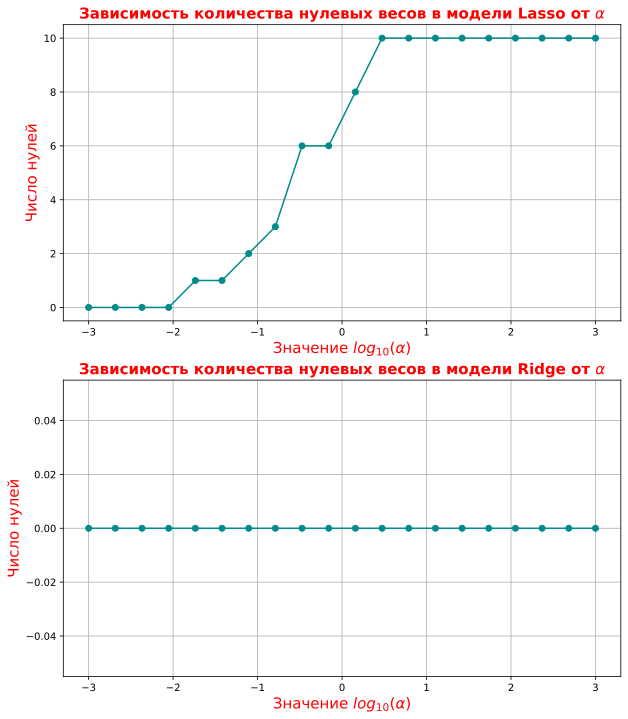

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(10,12))

plt.subplot(2, 1, 1)
plt.title(r'Зависимость количества нулевых весов в модели Lasso от $\alpha$', 
          color = 'r', fontweight = "bold", fontsize=15)

plt.xlabel(r'Значение $log_{10}(\alpha)$', color = 'r', fontsize=15)
plt.ylabel('Число нулей', color = 'r', fontsize=15)

plt.plot(np.log10(alphas), number_nulls_lasso, color='darkcyan', marker='o')
plt.grid()

plt.subplot(2, 1, 2)
plt.title(r'Зависимость количества нулевых весов в модели Ridge от $\alpha$', 
          color = 'r', fontweight = "bold", fontsize=15)

plt.xlabel(r'Значение $log_{10}(\alpha)$', color = 'r', fontsize=15)
plt.ylabel('Число нулей', color = 'r', fontsize=15)

plt.plot(np.log10(alphas), number_nulls_ridge, color='darkcyan', marker='o')
plt.grid()

plt.show()

**Ответ:** Графики строились без учета bias. Результаты почти согласуются с ожиданиями (ожидалось, что в Ridge тоже появятся нулевые или близкие к нулю коэффициенты, но они появляются если брать бОльшие значения $\alpha$, чем предложено в задании). Модель Lasso с определенного момента вырождается в константу.

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [18]:
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 58.3044
Train RMSE = 58.3270


In [19]:
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))

Test MAE = 49.6028
Train MAE = 48.4154


In [20]:
print('Test R^2 = %.4f' % r2_score(y_test, y_pred))
print('Train R^2 = %.4f' % r2_score(y_train, y_train_pred))

Test R^2 = 0.3599
Train R^2 = 0.4510


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости трех перечисленных выше метрик от коэффициента регуляризации. Заметно ли изменилось качество?

**Замечание:** функцию потерь на выборке (X, y) можно, например, посчитать вручную, вытащив коэффициенты из модели (обычно это атрибут coef_) и учитывая коэффициент регуляризации $\alpha$.

In [21]:
alphas_for_best = np.logspace(-3, 3, 100)

In [22]:
alphas_for_best.shape

(100,)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import sklearn

model = Ridge(alpha=item)
parametrs = { 'alpha': alphas_for_best}
cv = KFold(n_splits=5, shuffle=True, random_state=241)  # конструктор разбиений
grid = GridSearchCV(model, parametrs, cv=cv, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)
print("RMSE: ", grid.best_params_)

grid = GridSearchCV(model, parametrs, cv=cv, scoring='neg_mean_absolute_error')
grid.fit(X_train, y_train)
print("MAE: ", grid.best_params_)

grid = GridSearchCV(model, parametrs, cv=cv, scoring='r2')
grid.fit(X_train, y_train)
print("R^2: ", grid.best_params_)

RMSE:  {'alpha': 0.001}
MAE:  {'alpha': 0.0011497569953977356}
R^2:  {'alpha': 0.05722367659350217}


In [24]:
rmse_error = []
mae_error = []
r2_error = []

In [25]:
for index, item in enumerate(alphas_for_best):
    model = Ridge(alpha=item)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    rmse_error.append(mean_squared_error(y_train, y_train_pred, squared=False))
    mae_error.append(mean_absolute_error(y_train, y_train_pred))
    r2_error.append(r2_score(y_train, y_train_pred))

In [26]:
alphas_for_best[0:110:9]

array([1.00000000e-03, 3.51119173e-03, 1.23284674e-02, 4.32876128e-02,
       1.51991108e-01, 5.33669923e-01, 1.87381742e+00, 6.57933225e+00,
       2.31012970e+01, 8.11130831e+01, 2.84803587e+02, 1.00000000e+03])

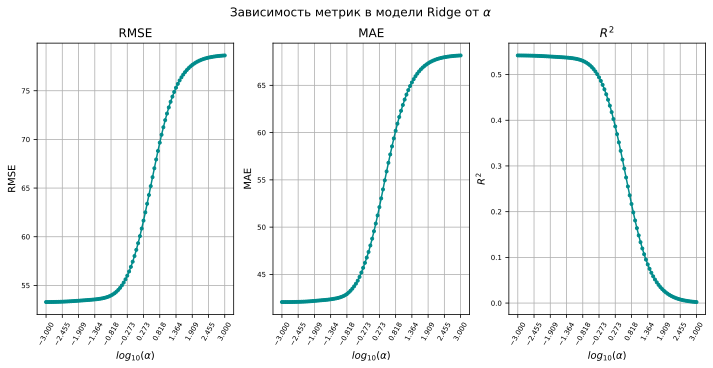

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(12,5))

plt.suptitle(r'Зависимость метрик в модели Ridge от $\alpha$')

plt.subplot(1, 3, 1)
plt.title('RMSE')
plt.xticks(np.log10(alphas_for_best[0:100:9]), rotation = 60, fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel(r'$log_{10}(\alpha)$')
plt.ylabel('RMSE')
plt.plot(np.log10(alphas_for_best), rmse_error, color='darkcyan', marker='o', markersize=3)
plt.grid()

plt.subplot(1, 3, 2)
plt.title('MAE')
plt.xticks(np.log10(alphas_for_best[0:100:9]), rotation = 60, fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel(r'$log_{10}(\alpha)$')
plt.ylabel('MAE')
plt.plot(np.log10(alphas_for_best), mae_error, color='darkcyan', marker='o', markersize=3)
plt.grid()

plt.subplot(1, 3, 3)
plt.title(r'$R^2$')
plt.xticks(np.log10(alphas_for_best[0:100:9]), rotation = 60, fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel(r'$log_{10}(\alpha)$')
plt.ylabel(r'$R^2$')

plt.plot(np.log10(alphas_for_best), r2_error, color='darkcyan', marker='o', markersize=3)
plt.grid()

plt.show()

Да, качество существенно зависит от коэффициента, зависимость похожа на сигмоиду.

__Задание 2.__ Поиск объектов-выбросов

**(0.5 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [28]:
from sklearn.model_selection import cross_val_predict
model = Ridge()
model.fit(X_train, y_train)

cv = KFold(n_splits=5, shuffle=True, random_state=241)  # конструктор разбиений
y_train_pred = cross_val_predict(model, X_train, y_train, cv=cv)

In [29]:
y_train_pred

array([141.89282681, 193.38332746, 142.88933642, 219.74272649,
       196.36235505, 129.63507311, 160.83746152, 190.67516009,
       188.44111873, 179.71327343, 223.20988281, 107.16022973,
       107.12747229, 106.01510272, 143.3464209 , 125.8481874 ,
       187.99396603, 141.16377864, 154.05026334, 170.88168364,
       219.74353196, 105.4095435 , 148.81478149, 165.91785708,
       162.56637442, 136.94952707, 163.41549677, 132.51857605,
       165.87806307, 103.11973613, 158.08510689, 173.20269363,
       168.47479738, 158.93166063, 160.50794006, 126.07312127,
       126.8890712 , 173.87334913, 162.88975288, 104.2756272 ,
       123.28513722, 109.74664172, 216.81033816, 207.18822926,
       177.72545372, 174.81974341,  92.9839362 , 174.5995168 ,
       101.04455269, 125.49624095, 170.90923108, 172.44040055,
       167.69780864,  95.78287488, 187.32387881, 147.2117077 ,
       148.23094796, 189.14743356, 130.23763671, 138.06766446,
       123.42599241, 192.52948679, 154.71719823,  93.86

In [30]:
mse_each = (y_train_pred - y_train) ** 2

In [31]:
mse_each

array([9.65452526e+00, 7.67668131e+03, 1.92913666e+02, 3.27839537e+03,
       1.07378402e+02, 7.11744089e+03, 7.08333288e+03, 9.81245595e+02,
       7.32544486e+01, 9.46470717e+03, 2.18931507e+03, 4.24585554e+03,
       3.28605252e+02, 2.91763132e+03, 6.94662588e+03, 6.21703666e+03,
       4.76183272e+03, 9.67512506e+01, 5.03386513e+03, 8.30410060e+00,
       7.98427986e+02, 2.74676025e+03, 2.89603071e+03, 1.16159247e+03,
       1.98616173e+03, 2.12064606e+03, 2.07794694e+03, 1.80782931e+03,
       9.82515838e+03, 6.31001143e+02, 2.29583698e+03, 6.07979866e+01,
       5.58725958e+01, 6.54993369e+03, 9.00992019e+01, 4.36565735e+03,
       1.68997356e+01, 6.86799200e+03, 1.85849341e+03, 1.04171611e+03,
       1.50924596e+02, 1.50130224e+03, 2.62105151e+02, 3.11495375e+03,
       1.22601261e+04, 7.08631560e+03, 1.68231749e+03, 6.78983963e+03,
       1.63584065e+01, 1.18999064e+03, 9.55285251e+00, 4.30283450e+01,
       1.33859829e+04, 1.07471689e+03, 4.26720914e+03, 7.72340816e+01,
      

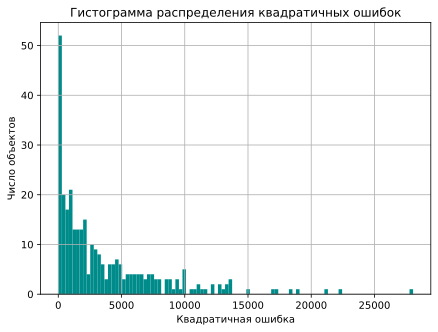

In [32]:
fig, ax = plt.subplots(figsize=(7,5))

plt.hist(mse_each, color='darkcyan', bins=100)
plt.title('Гистограмма распределения квадратичных ошибок')
plt.xlabel('Квадратичная ошибка')
plt.ylabel('Число объектов')
plt.grid()

plt.show()

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной (или, называемой валидационной) (X_test, y_test) выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

Будем считать выбросами объекты, где квадратичная ошибка >= 15000

In [33]:
X_train.shape

(309, 10)

In [34]:
mse_each[np.where(mse_each >= 15000)].shape

(7,)

In [35]:
X_train = X_train[np.where(mse_each < 15000)]

In [36]:
y_train = y_train[np.where(mse_each < 15000)]

Было

Test RMSE = 58.3044

Train RMSE = 58.3270

Test MAE = 49.6028

Train MAE = 48.4154

Test R^2 = 0.3599

Train R^2 = 0.4510

In [37]:
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))
print('Test R^2 = %.4f' % r2_score(y_test, y_pred))
print('Train R^2 = %.4f' % r2_score(y_train, y_train_pred))

Test RMSE = 59.4622
Train RMSE = 55.5477
Test MAE = 50.4823
Train MAE = 46.4922
Test R^2 = 0.3342
Train R^2 = 0.4643


**Ответ**: На train стало лучше, на test хуже. Связано это с тем, что в test тоже есть такие объекты-выбросы, с которыми ничего сделать нельзя.

## Часть 2. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [38]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [39]:
from sklearn.svm import LinearSVC

In [40]:
lsvc = LinearSVC(random_state=153, max_iter=100000)
lsvc.fit(X_train, y_train)
y_pred = lsvc.decision_function(X_test)

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [42]:
lr_auc = roc_auc_score(y_test, y_pred)
print('LinearSVC: ROC AUC=%.3f' % (lr_auc))

LinearSVC: ROC AUC=0.926


Можно сделать воспользоваться библиотечной реализацией, но я сделала по-другому

from sklearn import metrics

metrics.plot_roc_curve(lsvc, X_test, y_test)

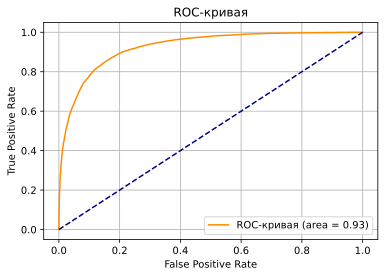

In [43]:
fpr, tpr, treshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.grid()
plt.show()

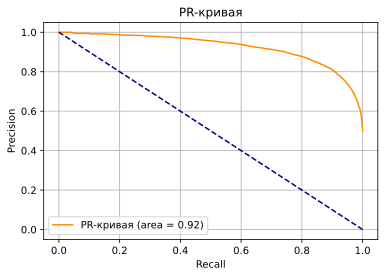

In [44]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)
fig, ax = plt.subplots()
ax.plot(recall, precision, color='darkorange',
         label='PR-кривая (area = %0.2f)' % auc_score)
ax.set_title('PR-кривая')
ax.set_ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
ax.set_xlabel('Recall')
plt.plot([1, 0], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower left")
plt.grid()
plt.show() 

In [45]:
# calculate precision-recall AUC
auc_score = auc(recall, precision)
print('LinearSVC: PR AUC=%.3f' % (auc_score))

LinearSVC: PR AUC=0.925


В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками (хотя бы 100 объектов, но желательно больше), обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

**Замечания:**
* Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой **меткой** (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте **разными цветами** (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Можно (и очень рекомендуется) рисовать не только разделяющую прямую, но из "разделяющую полосу" вокруг прямой.
* **Обязательно пишите легенду,** поясняющую что изображено на полотне.

In [46]:
X, y = make_classification(
    n_samples=500, n_features=2, n_informative=2, n_redundant=0,
    random_state=42)

X_train_proba, X_test_proba, y_train_proba, y_test_proba = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [47]:
X_train_proba.shape

(350, 2)

In [48]:
from sklearn.svm import SVC

In [49]:
svc_model = SVC(kernel='linear', random_state=153, max_iter=100000)
svc_model.fit(X_train_proba, y_train_proba)

SVC(kernel='linear', max_iter=100000, random_state=153)

In [50]:
support_vectors = svc_model.support_vectors_

In [51]:
w = svc_model.coef_
b = svc_model.intercept_

In [52]:
svc_model.coef_[0]

array([1.67560835, 0.3459066 ])

In [53]:
b

array([0.01285052])

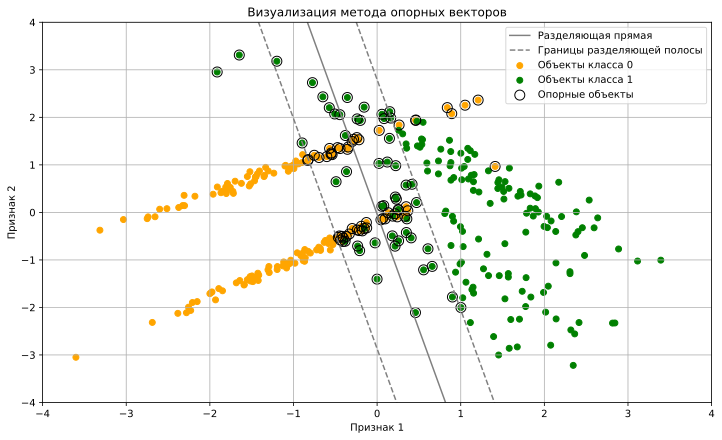

In [54]:
w = svc_model.coef_[0]
fig, ax = plt.subplots(figsize=(12, 7))
# Создание сетки для оценки модели
plt.xlim([-4, 4])
plt.ylim([-4, 4])
ax.set_ylabel('Признак 2')
ax.set_xlabel('Признак 1')
plt.title('Визуализация метода опорных векторов')

ax.scatter(X_train_proba[np.where(y_train_proba == 0)][:, 0], 
           X_train_proba[np.where(y_train_proba == 0)][:, 1], color='orange', label='Объекты класса 0')
ax.scatter(X_train_proba[np.where(y_train_proba == 1)][:, 0], 
           X_train_proba[np.where(y_train_proba == 1)][:, 1], color='green', label='Объекты класса 1')

# Рисунок границ решения и запасов
line_x = list(range(-100, 100))
line_y = [-x * w[0] / w[1] - b / w[1] for x in line_x]
plt.plot(line_x, line_y, color='grey', label='Разделяющая прямая')
plt.plot(line_x - 1 / sqrt(w[0] ** 2 + w[1] ** 2), line_y, color='grey', 
         linestyle='--', label='Границы разделяющей полосы')
plt.plot(line_x + 1 / sqrt(w[0] ** 2 + w[1] ** 2), line_y, color='grey', 
         linestyle='--')

# Выделение опорных векторов окружностями
ax.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, 
           linewidth=1, facecolors='none', edgecolors='k', label='Опорные объекты')
plt.legend()
plt.grid()
plt.show()

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [55]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((r + l) / 2)
        bin_real_ratios.append(np.sum(y_test[(preds >= l) & (preds < r)] == 1) / 
                              np.sum((preds >= l) & (preds < r))) 
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.grid()
    plt.ylim([0, 1.0])
    plt.xlim([0, 1.0])

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

In [56]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train_calibr, X_test_calibr, y_train_calibr, y_test_calibr = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression

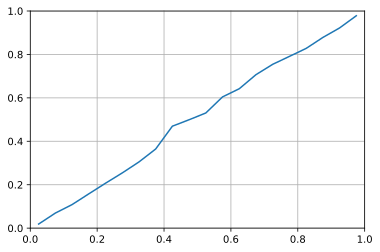

In [58]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(X_train_calibr, y_train_calibr)
plot_calibration_curve(y_test_calibr, logisticRegr.predict_proba(X_test_calibr)[:, 1])

In [59]:
from scipy.special import expit

/Users/polinakrivula/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


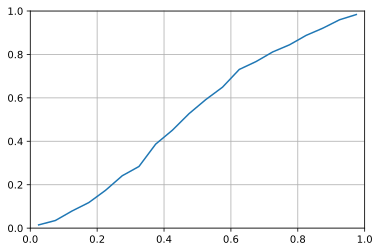

In [60]:
svc_model = SVC(kernel='linear', max_iter=1000000)
svc_model.fit(X_train_calibr, y_train_calibr)
future_sigm = svc_model.decision_function(X_test_calibr)
plot_calibration_curve(y_test_calibr, expit(future_sigm))

In [404]:
lr_predict = logisticRegr.predict_proba(X_test_calibr)[:, 1]
svc_predict = expit(svc_model.decision_function(X_test_calibr))

In [405]:
svc_predict

array([0.50110832, 0.79823007, 0.94164554, ..., 0.51566612, 0.60379228,
       0.68423169])

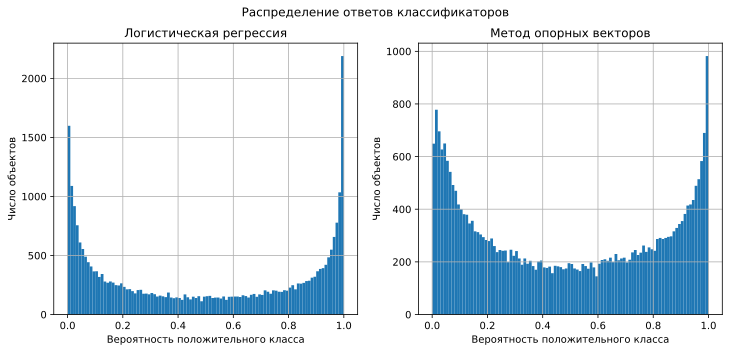

In [407]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
plt.suptitle('Распределение ответов классификаторов ')

plt.subplot(1, 2, 1)
plt.title('Логистическая регрессия')
plt.xlabel('Вероятность положительного класса')
plt.ylabel('Число объектов')
plt.hist(lr_predict, bins=100)
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Метод опорных векторов')
plt.xlabel('Вероятность положительного класса')
plt.ylabel('Число объектов')
plt.hist(svc_predict, bins=100)
plt.grid()

plt.show()

 Оба графика примерно симметричны относительно центра. У метода опорных векторов больше объектов с "неуверенными" вероятностями (около 0.5), но это связано в том числе и с тем, что для него требуется в десятки раз большее число итераций.

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [64]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB

base_clf = GaussianNB()
calibrated_clf = CalibratedClassifierCV(base_estimator=base_clf, cv=3)
calibrated_clf.fit(X_train_calibr, y_train_calibr)
y_pred = calibrated_clf.predict_proba(X_test_calibr)

<ipython-input-55-188a313247b1>:9: RuntimeWarning: invalid value encountered in long_scalars
  bin_real_ratios.append(np.sum(y_test[(preds >= l) & (preds < r)] == 1) /


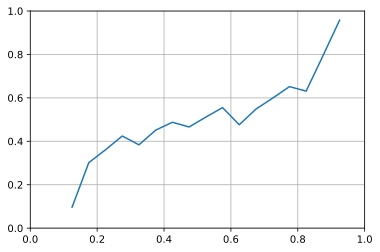

In [65]:
plot_calibration_curve(y_test_calibr, y_pred[:, 1])

Калибровочная кривая ухудшилась.

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

Для оценки калибровки применяется диаграмма надежности. Это гистограмма, где наблюдения, принадлежащие к одной ячейки, имеют равную вероятность. Чем кривая ближе к биссектрисе на графике, тем выше степень откалиброванности модели. Диаграмма является отображением функции распределения вероятности. Число столбцов находится с помощью правила Фридмана-Диакониса. Лучший результат - это самое маленькое отклонение от реальной вероятности.

In [66]:
def exp_cal_err(b, prb):
    num_count, num_edges = np.histogram(prb, bins = 'fd') #вычисление гистограммы набора данных
    #'fd' — правило Фридмана-Диакониса
    nums = len(num_count) #количество ячеек
    num_edges[0] -= 1e-8 #левый край не включен
    num_id = np.digitize(prb, num_edges, right = True) - 1 #вычисление индексов числовых интервалов
    num_b_sum = np.bincount(num_id, weights = b, minlength = nums) #количество вхождений в массив
    num_prb_sum = np.bincount(num_id, weights = prb, minlength = nums)
    num_b_mean = np.divide(num_b_sum, num_count, out = np.zeros(nums), where = num_count > 0) #деление массивов
    num_prb_mean = np.divide(num_prb_sum, num_count, out = np.zeros(nums), where = num_count > 0)
    expcaliber = np.abs((num_prb_mean - num_b_mean) * num_count).sum() / len(prb) #конечная формула
    return expcaliber

In [67]:
exp_cal_err(y_test, lr_predict)

0.010415111402910385

In [68]:
exp_cal_err(y_test, svc_predict)

0.042475608308879025

## Часть 3. Логистическая регрессия.

__Задание 3.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(0.5 балл)**

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [69]:
data = pd.read_csv('train-2.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

In [70]:
data.shape

(595212, 57)

In [71]:
np.sum(target)

21694

In [72]:
data.head(5)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
9,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
13,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
16,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [73]:
data.shape

(595212, 57)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [74]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [75]:
np.sum(target)

100000

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [76]:
lr = LogisticRegression(random_state=0, penalty='l2', max_iter=100000)
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)

Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

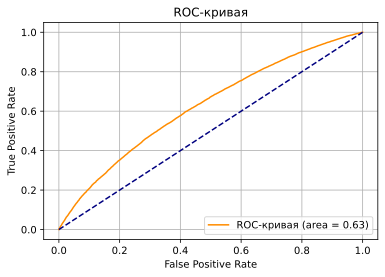

In [77]:
fpr, tpr, treshold = roc_curve(y_test, y_pred[:, 1])
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.grid()
plt.show()

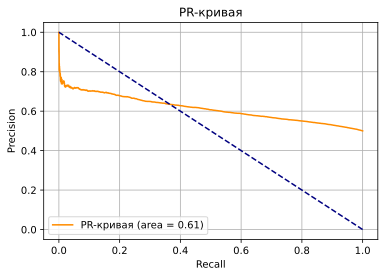

In [78]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred[:, 1])

pr_auc = auc(recall, precision)
fig, ax = plt.subplots()
ax.plot(recall, precision, color='darkorange',
         label='PR-кривая (area = %0.2f)' % pr_auc)
ax.set_title('PR-кривая')
ax.set_ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
ax.set_xlabel('Recall')
plt.plot([1, 0], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower left")
plt.grid()
plt.show() 

**Ответ: Результаты не очень хорошие**

Но это не синтетические данные, поэтому все не так плохо, как могло бы быть. Судя по PR-AUC, классификатор ненадежно распознает истинно положительные примеры, что могло и повлиять на качество ROC-AUC.

__Задание 4.__ Изучение влияния регуляризатора на процесс обучения

__(1 балл)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром `warm_start` у `sklearn.linear_model.LogisticRegression` либо методом `partial_fit` `sklearn.linear_model.SGDClassifier` (параметр `loss` тогда должен быть равен `log`).

Замечание:
* Для каждого $\alpha$ своя функция на графике; функции можно отображать на одном полотне **обязательно с легендой;** если $\alpha$ слишком много и на одном полотне они выглядят грязно, то можно строить на нескольких, однако в этом случае рекомендуется приводить масштаб и деления (min, max значения) на оси $y$ к одним  и тем же значениям --- так визуально будет очень просто сравнить графики и сделать выводы :)
* $\alpha$ желательно перебирать по **логарифмической шкале** (примерно как в первом задании), однако можно использовать информацию о том, что при некоторых значениях $\alpha$ модель не обучается хорошо и не исследовать их. Тут обязательно перебрать хотя бы 3 разных (степени в лог. шкале) $\alpha$, больше -- приветствуется.

In [79]:
from scipy.special import expit
from sklearn.linear_model import SGDClassifier

In [80]:
alphas = np.logspace(-3, 0, 4)
dict.fromkeys(alphas)

{0.001: None, 0.01: None, 0.1: None, 1.0: None}

In [81]:
from sklearn.metrics import log_loss

In [82]:
loss_from_alpha = dict.fromkeys(alphas)

for i in alphas:
    loss_func = []
    sgd = SGDClassifier(random_state=0, penalty='l2', loss = 'log', alpha=i)
    n_iter = 500

    for j in range(n_iter):
        sgd.partial_fit(X_train, y_train, classes=np.unique(y_train))
        loss_func.append(log_loss(y_train, sgd.predict(X_train)))
    loss_from_alpha[i] = loss_func

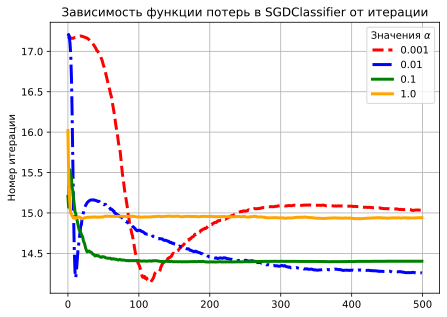

In [83]:
figsize(7, 5)
c = ['red', 'blue', 'green', 'orange', 'black']
line = ['--', '-.', '-', '-']
plt.ylabel('Значения функции потерь')
plt.ylabel('Номер итерации')
plt.title('Зависимость функции потерь в SGDClassifier от итерации')
for i, n in enumerate(alphas):
    plt.plot(loss_from_alpha[n], color=c[i], linewidth=3, label=n, linestyle=line[i])
plt.legend(title=r'Значения $\alpha$')
plt.grid()

## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

В этой части работаем с датасетом из предыдущей части.

__Задание 5.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [84]:
lr = LogisticRegression(random_state=0, penalty='l2', max_iter=100000)
lr.fit(X_train, y_train)
y_pred_proba = lr.predict_proba(X_test)
y_train_pred_proba = lr.predict_proba(X_train)

In [85]:
fpr, tpr, treshold = roc_curve(y_test, y_pred_proba[:, 1])
print('Test: ', auc(fpr, tpr))
fpr, tpr, treshold = roc_curve(y_train, y_train_pred_proba[:, 1])
print('Train: ', auc(fpr, tpr))

Test:  0.6251317906018978
Train:  0.6269468882280353


__Задание 6.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [86]:
data.head(5)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
783681,0,2,0,1,0,1,0,0,0,0,...,3,1,5,9,0,0,1,0,1,0
636497,0,1,6,1,0,0,1,0,0,0,...,5,2,1,10,0,1,1,0,1,0
659813,2,1,3,1,0,1,0,0,0,0,...,3,1,1,8,0,1,1,0,0,0
334742,0,1,10,0,0,1,0,0,0,0,...,7,2,2,11,0,0,1,1,0,0
1156570,0,1,9,0,6,1,0,0,0,0,...,8,1,1,8,0,1,0,0,1,0


In [87]:
data.shape

(200000, 57)

In [88]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [89]:
not_categ = []
for i in data.columns:
    if i[-3:] != 'cat':
        not_categ.append(i)

In [90]:
len(not_categ)

43

In [91]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(X_train.drop(columns=not_categ, axis=1))
X_train_encoded = enc.transform(X_train.drop(columns=not_categ, axis=1))
X_test_encoded = enc.transform(X_test.drop(columns=not_categ, axis=1))

In [92]:
X_train_encoded = pd.DataFrame(X_train_encoded.toarray())
X_test_encoded = pd.DataFrame(X_test_encoded.toarray())

In [93]:
for i in not_categ:
    X_train_encoded[i] = np.copy(X_train[i])
    X_test_encoded[i] = np.copy(X_test[i])

In [94]:
X_test_encoded.shape

(100000, 226)

In [95]:
import time
start_time = time.time()

lr = LogisticRegression(random_state=0, penalty='l2', max_iter=100000)
lr.fit(X_train_encoded, y_train)
y_pred_proba = lr.predict_proba(X_test_encoded)
y_train_pred_proba = lr.predict_proba(X_train_encoded)
print("--- %s seconds ---" % (time.time() - start_time))

--- 26.195533990859985 seconds ---


In [96]:
fpr, tpr, treshold = roc_curve(y_test, y_pred_proba[:, 1])
print('Test: ', auc(fpr, tpr))
fpr, tpr, treshold = roc_curve(y_train, y_train_pred_proba[:, 1])
print('Train: ', auc(fpr, tpr))

Test:  0.630243368010695
Train:  0.6375223803137349


Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__(Бонусная часть)__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

__(+0.5 балл)__

In [97]:
data = pd.read_csv('train-2.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

In [98]:
np.sum(target)

21694

In [99]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [100]:
data.columns

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

In [101]:
X_train['y_train'] = y_train

<ipython-input-101-7a0d0ab398b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['y_train'] = y_train


In [102]:
X_train.groupby('ps_ind_01')['y_train'].mean()

ps_ind_01
0    0.475092
1    0.475779
2    0.504748
3    0.536926
4    0.551708
5    0.522928
6    0.542698
7    0.556607
Name: y_train, dtype: float64

In [103]:
not_categ = []
categ = []
for i in data.columns:
    if i[-3:] != 'cat':
        not_categ.append(i)
    else:
        categ.append(i)

In [104]:
len(categ)

14

In [105]:
for i in categ:
    mean_enc = X_train.groupby(i)['y_train'].mean()
    X_train[i + '_m_enc'] = X_train[i].map(mean_enc)
    X_test[i + '_m_enc'] = X_test[i].map(mean_enc)

<ipython-input-105-76cd3aa9285f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[i + '_m_enc'] = X_train[i].map(mean_enc)
<ipython-input-105-76cd3aa9285f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[i + '_m_enc'] = X_test[i].map(mean_enc)


In [106]:
X_train.head(5)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_car_02_cat_m_enc,ps_car_03_cat_m_enc,ps_car_04_cat_m_enc,ps_car_05_cat_m_enc,ps_car_06_cat_m_enc,ps_car_07_cat_m_enc,ps_car_08_cat_m_enc,ps_car_09_cat_m_enc,ps_car_10_cat_m_enc,ps_car_11_cat_m_enc
id,,,,,,,,,,,,,,,,,,,,,
1049183,0,1,5,0,0,1,0,0,0,0,...,0.479677,0.472847,0.476990,0.524454,0.483755,0.487977,0.487694,0.476309,0.500136,0.535928
106872,1,1,3,1,0,0,1,0,0,0,...,0.479677,0.472847,0.476990,0.466620,0.471118,0.487977,0.487694,0.500000,0.500136,0.552093
28943,6,2,7,1,0,0,0,1,0,0,...,0.581916,0.472847,0.476990,0.523254,0.465336,0.487977,0.487694,0.476309,0.500136,0.406821
851826,1,1,5,1,0,0,0,1,0,0,...,0.479677,0.520075,0.571245,0.523254,0.483755,0.487977,0.487694,0.500000,0.500136,0.533981
934813,0,1,1,0,4,1,0,0,0,0,...,0.479677,0.520075,0.476990,0.524454,0.514134,0.487977,0.487694,0.606051,0.500136,0.519214


In [107]:
X_test.head(5)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_car_02_cat_m_enc,ps_car_03_cat_m_enc,ps_car_04_cat_m_enc,ps_car_05_cat_m_enc,ps_car_06_cat_m_enc,ps_car_07_cat_m_enc,ps_car_08_cat_m_enc,ps_car_09_cat_m_enc,ps_car_10_cat_m_enc,ps_car_11_cat_m_enc
id,,,,,,,,,,,,,,,,,,,,,
1050571,1,2,2,0,0,0,0,1,0,0,...,0.479677,0.472847,0.476990,0.466620,0.465336,0.487977,0.487694,0.500000,0.500136,0.395509
134934,4,3,9,1,0,0,1,0,0,0,...,0.479677,0.520075,0.587327,0.524454,0.564460,0.487977,0.487694,0.500000,0.500136,0.552093
630943,0,2,1,0,0,0,1,0,0,0,...,0.479677,0.472847,0.587327,0.466620,0.514134,0.487977,0.487694,0.500000,0.500136,0.552093
48209,7,3,7,0,0,0,0,0,1,0,...,0.479677,0.472847,0.587327,0.523254,0.536443,0.487977,0.487694,0.476309,0.500136,0.552093
867010,0,1,4,0,0,1,0,0,0,0,...,0.479677,0.472847,0.476990,0.466620,0.465336,0.487977,0.487694,0.500000,0.500136,0.395509


In [108]:
X_train['ps_car_02_cat']

id
1049183    1
106872     1
28943      0
851826     1
934813     1
          ..
624097     0
697975     0
723907     0
1055788    1
1072907    1
Name: ps_car_02_cat, Length: 100000, dtype: int64

In [109]:
X_test['ps_car_02_cat']

id
1050571    1
134934     1
630943     1
48209      1
867010     1
          ..
76257      1
1473124    0
1463549    1
798795     0
346051     1
Name: ps_car_02_cat, Length: 100000, dtype: int64

выше была небольшая проверка, что все, кажется, правильно. Теперь нужно добавить шум и удалить старые колонки с категориями.

In [110]:
X_train = X_train.drop(columns=['y_train'], axis=1)
X_train = X_train.drop(columns=categ, axis=1)
X_test = X_test.drop(columns=categ, axis=1)

In [111]:
for i in categ:
    X_train[i + '_m_enc'] += np.random.normal(0, 0.01, size=X_train.shape[0])

In [112]:
start_time = time.time()

lr = LogisticRegression(random_state=0, penalty='l2', max_iter=100000)
lr.fit(X_train, y_train)
y_pred_proba = lr.predict_proba(X_test)
y_train_pred_proba = lr.predict_proba(X_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 19.768006324768066 seconds ---


In [113]:
fpr, tpr, treshold = roc_curve(y_test, y_pred_proba[:, 1])
print('Test: ', auc(fpr, tpr))
fpr, tpr, treshold = roc_curve(y_train, y_train_pred_proba[:, 1])
print('Train: ', auc(fpr, tpr))

Test:  0.6287238326536232
Train:  0.6325951243093697


**Ответ**: Работает в разы быстрее, чем One hot кодирование (так как размерность признакового пространства не меняется), но точность уменьшилась. Замечу, что ранее я считала что не только признаки, заканчивающиеся на cat, являются категориальными, и таким образом была достигнута точность около 0,8 (на тесте).

__(Бонусная часть)__ Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум). 

__(+0.5 балла)__

In [114]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [115]:
X_train['y_train'] = y_train

<ipython-input-115-7a0d0ab398b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['y_train'] = y_train


In [116]:
X_train.groupby('ps_car_02_cat')['y_train'].cumsum()

id
1016253        0
654294         0
181126         1
1104462        1
1116339        2
           ...  
976400     38209
955442     38210
978232     38210
1189820    38211
589612     38211
Name: y_train, Length: 100000, dtype: int64

In [117]:
X_train.head(5)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,y_train
id,,,,,,,,,,,,,,,,,,,,,
1016253,7,2,2,0,0,0,0,0,1,0,...,4,4,6,0,1,0,0,1,0,0
654294,0,2,1,0,0,0,1,0,0,0,...,1,2,10,0,0,0,0,0,1,0
181126,0,2,0,1,-1,1,0,0,0,0,...,2,2,9,1,1,1,0,1,0,1
1104462,1,1,9,1,0,0,1,0,0,0,...,1,3,7,0,0,1,0,0,0,0
1116339,0,1,4,0,5,1,0,0,0,0,...,0,5,8,0,1,0,0,1,0,1


In [118]:
X_train['ones'] = np.ones(X_train.shape[0])

<ipython-input-118-1ed0045e6dde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ones'] = np.ones(X_train.shape[0])


In [119]:
X_train.groupby('ps_car_02_cat')['ones'].cumsum()

id
1016253        1.0
654294         2.0
181126         3.0
1104462        4.0
1116339        5.0
            ...   
976400     79924.0
955442     79925.0
978232     79926.0
1189820    79927.0
589612     79928.0
Name: ones, Length: 100000, dtype: float64

In [120]:
not_categ = []
categ = []
for i in data.columns:
    if i[-3:] != 'cat':
        not_categ.append(i)
    else:
        categ.append(i)

In [121]:
for i in categ:
    mean_enc = X_train.groupby(i)['y_train'].mean()
    X_train[i + '_m_enc'] = (X_train.groupby(i)['y_train'].cumsum() /
                            X_train.groupby(i)['ones'].cumsum())
    X_test[i + '_m_enc'] = X_test[i].map(mean_enc)

<ipython-input-121-35c7801d75ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[i + '_m_enc'] = (X_train.groupby(i)['y_train'].cumsum() /
<ipython-input-121-35c7801d75ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[i + '_m_enc'] = X_test[i].map(mean_enc)


In [122]:
X_train = X_train.drop(columns=['y_train', 'ones'], axis=1)
X_train = X_train.drop(columns=categ, axis=1)
X_test = X_test.drop(columns=categ, axis=1)

In [123]:
for i in categ:
    X_train[i + '_m_enc'] += np.random.normal(0, 0.01, size=X_train.shape[0])

In [124]:
start_time = time.time()

lr = LogisticRegression(random_state=0, penalty='l2', max_iter=100000)
lr.fit(X_train, y_train)
y_pred_proba = lr.predict_proba(X_test)
y_train_pred_proba = lr.predict_proba(X_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 12.956072092056274 seconds ---


In [125]:
fpr, tpr, treshold = roc_curve(y_test, y_pred_proba[:, 1])
print('Test: ', auc(fpr, tpr))
fpr, tpr, treshold = roc_curve(y_train, y_train_pred_proba[:, 1])
print('Train: ', auc(fpr, tpr))

Test:  0.6253186130861682
Train:  0.636336848402425


Работает быстрее на 25%, чем прошлый метод кодирования, точность почти такого же порядка. Повыше на трейне, пониже на тесте (при текущем запуске всего лишь на 0.0004 ниже).

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

__(0.5 балл)__

In [126]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [127]:
global_mean = np.mean(y_train)
c = 10

In [128]:
X_train['y_train'] = y_train

<ipython-input-128-7a0d0ab398b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['y_train'] = y_train


In [129]:
X_train.groupby('ps_calc_12')['y_train'].mean()

ps_calc_12
0    0.498745
1    0.500655
2    0.500886
3    0.497861
4    0.486952
5    0.496689
6    0.473846
7    0.403846
8    0.727273
Name: y_train, dtype: float64

In [130]:
X_train.groupby('ps_calc_12')['y_train'].sum() / X_train.groupby('ps_calc_12')['y_train'].count()

ps_calc_12
0    0.498745
1    0.500655
2    0.500886
3    0.497861
4    0.486952
5    0.496689
6    0.473846
7    0.403846
8    0.727273
Name: y_train, dtype: float64

In [131]:
for i in categ:
    mean_enc = (X_train.groupby(i)['y_train'].sum() + c * global_mean
               ) / (X_train.groupby(i)['y_train'].count() + c)
    X_train[i + '_m_enc'] = X_train[i].map(mean_enc)
    X_test[i + '_m_enc'] = X_test[i].map(mean_enc)

<ipython-input-131-fe0ace211e47>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[i + '_m_enc'] = X_train[i].map(mean_enc)
<ipython-input-131-fe0ace211e47>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[i + '_m_enc'] = X_test[i].map(mean_enc)


In [132]:
X_train = X_train.drop(columns=categ, axis=1)
X_test = X_test.drop(columns=categ, axis=1)
X_train = X_train.drop(columns=['y_train'], axis=1)

In [133]:
for i in categ:
    X_train[i + '_m_enc'] += np.random.normal(0, 0.01, size=X_train.shape[0])

In [134]:
X_train.head()

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_car_02_cat_m_enc,ps_car_03_cat_m_enc,ps_car_04_cat_m_enc,ps_car_05_cat_m_enc,ps_car_06_cat_m_enc,ps_car_07_cat_m_enc,ps_car_08_cat_m_enc,ps_car_09_cat_m_enc,ps_car_10_cat_m_enc,ps_car_11_cat_m_enc
id,,,,,,,,,,,,,,,,,,,,,
103756,2,2,0,1,0,0,0,0,0,0,...,0.464940,0.472619,0.458121,0.466555,0.499071,0.497442,0.559991,0.487688,0.504318,0.545054
1233512,5,5,0,0,1,0,0,0,0,0,...,0.590251,0.510349,0.475753,0.528369,0.456988,0.481690,0.490321,0.480403,0.512392,0.487425
1093171,0,0,1,0,0,0,0,0,0,0,...,0.485815,0.493012,0.473410,0.470810,0.489750,0.482898,0.484287,0.484950,0.497299,0.445489
684220,1,1,0,1,0,0,0,0,0,0,...,0.575237,0.573011,0.489392,0.495071,0.594410,0.482638,0.538965,0.494005,0.488312,0.535089
895188,2,1,1,0,0,0,0,0,0,0,...,0.488335,0.484770,0.470414,0.467972,0.485514,0.471027,0.480381,0.492695,0.499725,0.424892


In [135]:
start_time = time.time()

lr = LogisticRegression(random_state=0, penalty='l2', max_iter=100000)
lr.fit(X_train, y_train)
y_pred_proba = lr.predict_proba(X_test)
y_train_pred_proba = lr.predict_proba(X_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 16.05524206161499 seconds ---


In [136]:
fpr, tpr, treshold = roc_curve(y_test, y_pred_proba[:, 1])
print('Test: ', auc(fpr, tpr))
fpr, tpr, treshold = roc_curve(y_train, y_train_pred_proba[:, 1])
print('Train: ', auc(fpr, tpr))

Test:  0.6261601492946958
Train:  0.6283147589492534


__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

**Ответ**: При кодировании таким образом все работает в разы быстрее, не меняется размерность пространства. Но при этом точность становится меньше, возможно переобучение, если не добавлять или добавлять "плохой" шум.

## Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [137]:
data = pd.read_csv('train-2.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [138]:
data.shape

(595212, 57)

In [139]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(data.drop(columns=not_categ, axis=1))
X_train_encoded = enc.transform(X_train.drop(columns=not_categ, axis=1))
X_test_encoded = enc.transform(X_test.drop(columns=not_categ, axis=1))

In [140]:
X_train_encoded = pd.DataFrame(X_train_encoded.toarray())

In [141]:
X_train_encoded

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476164,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
476165,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
476166,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
476167,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
X_test_encoded = pd.DataFrame(X_test_encoded.toarray())

In [143]:
for i in not_categ:
    X_train_encoded[i] = np.copy(X_train[i])
    X_test_encoded[i] = np.copy(X_test[i])

In [144]:
X_train_encoded.shape

(476169, 227)

Получили 227 признаков

В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [145]:
import time
start_time = time.time()

lr = LogisticRegression(random_state=0, penalty='l2', max_iter=100000)
lr.fit(X_train_encoded, y_train)
y_pred_proba = lr.predict_proba(X_test_encoded)
y_train_pred_proba = lr.predict_proba(X_train_encoded)
print("--- %s seconds ---" % (time.time() - start_time))

--- 115.47102689743042 seconds ---


In [146]:
fpr, tpr, treshold = roc_curve(y_test, y_pred_proba[:, 1])
print('Test: ', auc(fpr, tpr))
fpr, tpr, treshold = roc_curve(y_train, y_train_pred_proba[:, 1])
print('Train: ', auc(fpr, tpr))

Test:  0.6380459616935146
Train:  0.6341146723100136


### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков (время обучения нашего метода отбора).

Изменилось ли качество? Как?

__(0.5 балла)__

In [147]:
start_time = time.time()

best_coef = np.sort(abs(lr.coef_))[0][-200:]
not_best_columns = []
for n, i in enumerate(X_train_encoded.columns):
    if not abs(lr.coef_[0][n]) in best_coef:
        not_best_columns.append(i)
        
X_train_best = X_train_encoded.drop(columns=not_best_columns, axis=1)
X_test_best = X_test_encoded.drop(columns=not_best_columns, axis=1)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.5138130187988281 seconds ---


In [148]:
len(not_best_columns)

27

In [149]:
X_train_best = X_train_encoded.drop(columns=not_best_columns, axis=1)
X_test_best = X_test_encoded.drop(columns=not_best_columns, axis=1)

In [150]:
start_time = time.time()

lr = LogisticRegression(random_state=0, penalty='l2', max_iter=100000)
lr.fit(X_train_best, y_train)
y_pred_proba = lr.predict_proba(X_test_best)
y_train_pred_proba = lr.predict_proba(X_train_best)
print("--- %s seconds ---" % (time.time() - start_time))

--- 68.21075701713562 seconds ---


In [151]:
fpr, tpr, treshold = roc_curve(y_test, y_pred_proba[:, 1])
print('Test: ', auc(fpr, tpr))
fpr, tpr, treshold = roc_curve(y_train, y_train_pred_proba[:, 1])
print('Train: ', auc(fpr, tpr))

Test:  0.638299138041683
Train:  0.6340189773836563


Качество изменилось - немного улучшилось на тесте. Время работы программы уменьшилось почти в два раза.

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [152]:
X_train_encoded.head(5)

,0,1,2,3,4,5,6,7,8,9,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2,1,5,8,0,1,1,0,0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,6,0,2,5,0,1,1,0,1,0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,9,1,5,3,0,0,0,0,1,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,8,1,2,4,0,1,0,0,1,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,9,2,3,8,0,1,1,1,0,0


In [153]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train_encoded[not_categ])
X_train_encoded[not_categ] = scaler.transform(X_train_encoded[not_categ])
X_test_encoded[not_categ] = scaler.transform(X_test_encoded[not_categ])

In [154]:
X_train_encoded.head(5)

,0,1,2,3,4,5,6,7,8,9,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-1.474800,-0.366932,1.255438,0.167902,-0.374224,0.770070,0.896340,-0.635013,-0.731521,-0.42610
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.238818,-1.197520,-0.515813,-0.924361,-0.374224,0.770070,0.896340,-0.635013,1.367015,-0.42610
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.524032,-0.366932,1.255438,-1.652537,-0.374224,-1.298584,-1.115649,-0.635013,1.367015,2.34687
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.095627,-0.366932,-0.515813,-1.288449,-0.374224,0.770070,-1.115649,-0.635013,1.367015,2.34687
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.524032,0.463656,0.074604,0.167902,-0.374224,0.770070,0.896340,1.574771,-0.731521,-0.42610


In [155]:
import time
start_time = time.time()

lr = LogisticRegression(random_state=0, penalty='l2', max_iter=100000)
lr.fit(X_train_encoded, y_train)
y_pred_proba = lr.predict_proba(X_test_encoded)
y_train_pred_proba = lr.predict_proba(X_train_encoded)
print("--- %s seconds ---" % (time.time() - start_time))

--- 35.71635890007019 seconds ---


In [156]:
fpr, tpr, treshold = roc_curve(y_test, y_pred_proba[:, 1])
print('Test: ', auc(fpr, tpr))
fpr, tpr, treshold = roc_curve(y_train, y_train_pred_proba[:, 1])
print('Train: ', auc(fpr, tpr))

Test:  0.6381207689771583
Train:  0.6341106736463682


При масштабировании качество практически не изменилось, так как до этого веса подбирались так, чтобы выполнялось масштабирование. Оставим признаки с 200 наибольшими весами.

In [157]:
start_time = time.time()

best_coef = np.sort(abs(lr.coef_))[0][-200:]
not_best_columns = []
for n, i in enumerate(X_train_encoded.columns):
    if not abs(lr.coef_[0][n]) in best_coef:
        not_best_columns.append(i)
        
X_train_best = X_train_encoded.drop(columns=not_best_columns, axis=1)
X_test_best = X_test_encoded.drop(columns=not_best_columns, axis=1)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.654210090637207 seconds ---


In [158]:
start_time = time.time()

lr = LogisticRegression(random_state=0, penalty='l2', max_iter=100000)
lr.fit(X_train_best, y_train)
y_pred_proba = lr.predict_proba(X_test_best)
y_train_pred_proba = lr.predict_proba(X_train_best)
print("--- %s seconds ---" % (time.time() - start_time))

--- 39.62408494949341 seconds ---


In [159]:
fpr, tpr, treshold = roc_curve(y_test, y_pred_proba[:, 1])
print('Test: ', auc(fpr, tpr))
fpr, tpr, treshold = roc_curve(y_train, y_train_pred_proba[:, 1])
print('Train: ', auc(fpr, tpr))

Test:  0.638333730585434
Train:  0.6341336337190889


Качество еще немного улучшилось.

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu_{+/-}$, $\sigma_{+/-}$, $n_{+/-}$ соответственно это --- среднее; среднеквадратичное отклонение; количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков (время обучения нашего метода отбора) в этом случаев.

__(0.5 балла)__

In [160]:
X_train_encoded.shape

(476169, 227)

In [161]:
X_train_encoded.head(3)

,0,1,2,3,4,5,6,7,8,9,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-1.474800,-0.366932,1.255438,0.167902,-0.374224,0.770070,0.896340,-0.635013,-0.731521,-0.42610
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.238818,-1.197520,-0.515813,-0.924361,-0.374224,0.770070,0.896340,-0.635013,1.367015,-0.42610
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.524032,-0.366932,1.255438,-1.652537,-0.374224,-1.298584,-1.115649,-0.635013,1.367015,2.34687


In [162]:
X_train_encoded[0].nunique()

2

In [163]:
t_stat = []

for i in X_test_encoded.columns:
    mu_plus = np.mean(X_train_encoded[i].values[np.where(y_train == 1)])
    mu_minus = np.mean(X_train_encoded[i].values[np.where(y_train == 0)])
    n_plus = len(X_train_encoded[i].values[np.where(y_train == 1)])
    n_minus = len(X_train_encoded[i].values[np.where(y_train == 0)])
    sigma_plus = np.std(X_train_encoded[i].values[np.where(y_train == 1)])
    sigma_minus = np.std(X_train_encoded[i].values[np.where(y_train == 0)])
    t_new = abs(mu_plus - mu_minus) * sqrt(n_plus + n_minus) / sqrt(n_plus * sigma_plus * sigma_plus
                                                                    + n_minus * sigma_minus * sigma_minus)
    if not sqrt(n_plus * sigma_plus * sigma_plus + n_minus * sigma_minus * sigma_minus):
        print(n_plus, n_minus, sigma_plus,sigma_minus, i )
    t_stat.append(t_new)

In [164]:
t_stat = np.array(t_stat)
t_stat[np.isnan(t_stat)] = 0

In [165]:
start_time = time.time()

best_coef = np.sort(abs(t_stat))[-200:]
not_best_columns = []
for n, i in enumerate(X_train_encoded.columns):
    if not abs(t_stat[n]) in best_coef:
        not_best_columns.append(i)
        
X_train_best = X_train_encoded.drop(columns=not_best_columns, axis=1)
X_test_best = X_test_encoded.drop(columns=not_best_columns, axis=1)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.5258848667144775 seconds ---


In [166]:
start_time = time.time()

lr = LogisticRegression(random_state=0, penalty='l2', max_iter=100000)
lr.fit(X_train_best, y_train)
y_pred_proba = lr.predict_proba(X_test_best)
y_train_pred_proba = lr.predict_proba(X_train_best)
print("--- %s seconds ---" % (time.time() - start_time))

--- 71.39639234542847 seconds ---


In [167]:
fpr, tpr, treshold = roc_curve(y_test, y_pred_proba[:, 1])
print('Test: ', auc(fpr, tpr))
fpr, tpr, treshold = roc_curve(y_train, y_train_pred_proba[:, 1])
print('Train: ', auc(fpr, tpr))

Test:  0.6386460882641382
Train:  0.634017442630507


Качество еще немного улучшилось.

### Методы-обёртки

__Задание 10.__ 

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо. 

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [200]:
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train_encoded, 
                                                              y_train, test_size=0.5)

In [201]:
X_val.shape

(238085, 227)

In [202]:
X_test.shape

(119043, 227)

In [203]:
X_train_train.shape

(238084, 227)

In [195]:
start_time = time.time()

X_train_new = X_train_train.drop(columns=[0], axis=1)
X_test_new = X_val.drop(columns=[0], axis=1)
lr = LogisticRegression(random_state=0, penalty='l2', max_iter=1000)
lr.fit(X_train_new, y_train_train)
y_pred_proba = lr.predict_proba(X_test_new)
y_train_pred_proba = lr.predict_proba(X_train_new)

fpr, tpr, treshold = roc_curve(y_val, y_pred_proba[:, 1])
print('Val: ', auc(fpr, tpr))
fpr, tpr, treshold = roc_curve(y_train_train, y_train_pred_proba[:, 1])
print('Train: ', auc(fpr, tpr))

print("--- %s seconds ---" % (time.time() - start_time))

Val:  0.6239515573636186
Train:  0.6381639523532159
--- 59.206498861312866 seconds ---


In [205]:
lst = list(X_train_train.columns)
n = 5
grps = (lst[i:i + n] for i in range(0, len(lst), n))
grps

<generator object <genexpr> at 0x7f940a818cf0>

In [206]:
ind = numpy.random.choice(X_train_train.shape[0], 10000, replace=False)

In [207]:
y_train_train[ind]

array([0, 0, 0, ..., 0, 0, 0])

In [208]:
start_time = time.time()

while X_train_train.shape[1] > 200:
    worst_auc = 10
    worst_group = []
    lst = list(X_train_train.columns)
    random.shuffle(lst)
    n = 5
    grps = (lst[i:i + n] for i in range(0, len(lst), n))
    ind = numpy.random.choice(X_train_train.shape[0], 10000, replace=False)
    for i in grps:
        # print(i)
        lr = LogisticRegression(random_state=0, penalty='l2', max_iter=1000)
        lr.fit(X_train_train.drop(columns=i, axis=1).iloc[ind], y_train_train[ind])
        y_pred_proba = lr.predict_proba(X_val.drop(columns=i, axis=1).iloc[ind])

        fpr, tpr, treshold = roc_curve(y_val[ind], y_pred_proba[:, 1])
        # score_columns[i] = auc(fpr, tpr)
        new_auc = auc(fpr, tpr)
        if new_auc < worst_auc:
            worst_auc = new_auc
            worst_group = i
    X_train_train = X_train_train.drop(columns=worst_group, axis=1)
    X_val = X_val.drop(columns=worst_group, axis=1)
    X_test = X_test.drop(columns=worst_group, axis=1)

print("--- %s seconds ---" % (time.time() - start_time))

--- 395.42071413993835 seconds ---


In [209]:
X_train_train.shape

(238084, 197)

In [210]:
lr = LogisticRegression(random_state=0, penalty='l2', max_iter=100000)
lr.fit(X_train_train, y_train_train)
y_val_pred_proba = lr.predict_proba(X_val)
y_train_pred_proba = lr.predict_proba(X_train_train)
y_pred_proba = lr.predict_proba(X_test)

fpr, tpr, treshold = roc_curve(y_test, y_pred_proba[:, 1])
print('Test: ', auc(fpr, tpr))
fpr, tpr, treshold = roc_curve(y_val, y_val_pred_proba[:, 1])
print('Val: ', auc(fpr, tpr))
fpr, tpr, treshold = roc_curve(y_train_train, y_train_pred_proba[:, 1])
print('Train: ', auc(fpr, tpr))

Test:  0.6243990196100305
Val:  0.613003532201061
Train:  0.6297055105348214


Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ**: 
(на момент запуска при написании этого ответа)

0. Без отбора Test:  0.6380459616935146
Train:  0.6341146723100136, 113.2 с

1. Встроенные методы Test:  0.638333730585434
Train:  0.6341336337190889, 40.3 c

2. Методы фильтрации
Test:  0.6386460882641382
Train:  0.634017442630507, 74.6 c

3. Методы-обёртки Test:  0.6243990196100305
Val:  0.613003532201061
Train:  0.6297055105348214
Долго отбираются сами признаки (400 с).

В первых двух методах быстро отбираются признаки (меньше секунды). В третьем идет очень долгий отбор при том, что я "выкидывала" за раз по 5 признаков. Первые два дали лучше точность, но скорее всего, за счет того, что в последнем методе отбор происходил по 5 признаков, а не по одному. Лучшее качество дали методы фильтрации. В первых двух методах сразу выбирается фиксированное число признаков, которые мы хотим оставить (200), в отличие от последнего, где можно остановиться, если достигнуть нужного качества. Поэтому в первых двух можно легко случайно выбросить потенциально полезные признаки.

## Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку. 

Воспользуемся той же самой задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты. 

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000. 

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [350]:
data = pd.read_csv('train-2.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [351]:
np.mean(y_train)

0.036484945471040746

Потому что страховка работает так, что 10 (условно) человек, которым она не понадобится, платят в сумме столько, чтобы страховая могла покрыть расходы на одного, которому понадобится. И чтобы еще страховой осталось покушать.

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [352]:
not_categ = []
for i in data.columns:
    if i[-3:] != 'cat':
        not_categ.append(i)

In [353]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(X_train.drop(columns=not_categ, axis=1))
X_train_encoded = enc.transform(X_train.drop(columns=not_categ, axis=1))
X_test_encoded = enc.transform(X_test.drop(columns=not_categ, axis=1))

In [354]:
X_train_encoded = pd.DataFrame(X_train_encoded.toarray())
X_test_encoded = pd.DataFrame(X_test_encoded.toarray())
for i in not_categ:
    X_train_encoded[i] = np.copy(X_train[i])
    X_test_encoded[i] = np.copy(X_test[i])

In [355]:
X_train_encoded.shape

(476169, 227)

In [356]:
X_train = X_train_encoded
X_test = X_test_encoded

In [357]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2,1,5,8,0,1,1,0,0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,6,0,2,5,0,1,1,0,1,0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,9,1,5,3,0,0,0,0,1,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,8,1,2,4,0,1,0,0,1,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,9,2,3,8,0,1,1,1,0,0


В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [358]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, penalty='l2', max_iter=1000)
lr.fit(X_train, y_train)
y_pred_proba = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)

Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

In [359]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

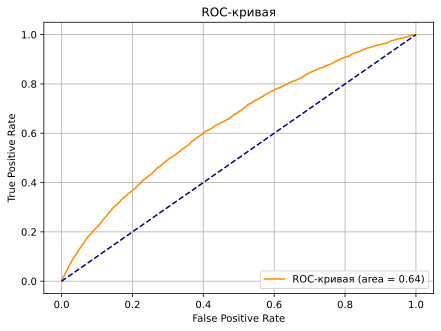

In [360]:
fpr, tpr, treshold = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Точность получилась почти такая же, как и при сэмплировании данных. Судя по полученным ниже результатам, классификатор надежно распознает истинно отрицательные объекты (не обратившиеся в страховую) и крайне ненадежно истинно положительные.

Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

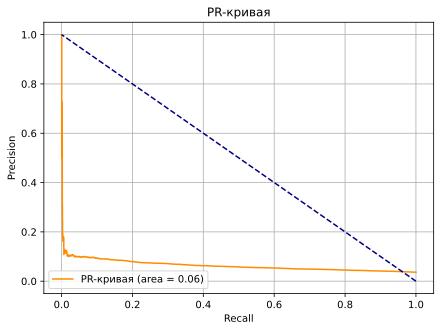

In [361]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

pr_auc = auc(recall, precision)
fig, ax = plt.subplots()
ax.plot(recall, precision, color='darkorange',
         label='PR-кривая (area = %0.2f)' % pr_auc)
ax.set_title('PR-кривая')
ax.set_ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
ax.set_xlabel('Recall')
plt.plot([1, 0], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower left")
plt.grid()
plt.show() 

PR кривая очень плохая потому что у нас в принципе положительных объектов очень мало. Судя по PR-AUC, классификатор КРАЙНЕ ненадежно распознает истинно положительные примеры.

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 11.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем?

In [362]:
thresholds

array([0.01153822, 0.01154272, 0.01154357, ..., 0.46789538, 0.4764739 ,
       0.51072466])

In [363]:
pred = y_pred_proba[:, 1] >= thresholds[(precision >= 0.95)[:-1]][0]

In [364]:
pred.shape

(119043,)

In [365]:
y_test.shape

(119043,)

In [366]:
pred = pred.astype(int)

In [367]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [368]:
tp = np.sum((pred == 1) & (y_test == 1))
fp = np.sum((pred == 1) & (y_test == 0))
fn = np.sum((pred == 0) & (y_test == 1))

In [369]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)

In [370]:
print("precision, recall", precision, recall)

precision, recall 1.0 0.0004628558204119417


In [371]:
print("откажем в %0.4f процентах случаев" % (np.sum(pred) / len(pred) * 100))

откажем в 0.0017 процентах случаев


потенциально откажем двум клиентам, которых определили как тех, кто обратится в страховую. Это 1.7е-05 часть от клиентов.

Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился. 

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги, и те, кто не обратился бы, то есть принёс бы нам деньги. Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной. 

__Задание 12.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный. Доход, очевидно, считается только по тем людям, которым мы предполагаем что не отказали.

__(1 балл)__

In [381]:
base_expense = 100000
base_income = 5000

Рассмотрим порог из предыдущего задания (95%)

In [382]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [383]:
pred = (y_pred_proba[:, 1] >= thresholds[(precision >= 0.95)[:-1]][0]).astype(int)

Считаем наш доход (на клиентах, которым мы НЕ отказали)

In [384]:
income = np.sum((pred == 0) & (y_test == 0)) * base_income - np.sum((pred == 0) & (y_test == 1)) * base_expense

Считаем неявные убытки от клиентов, которым мы отказали, но которые могли никуда не обращаться

In [387]:
expense = np.sum((pred == 1) & (y_test == 0)) * base_income

In [388]:
print("Наш баланс", income - expense)

Наш баланс 141710000


А на каком значение порога это разнциа максимальна? Скольким клиентам мы отказали в обслуживании?

In [389]:
limits = []
i = 0.07
while (i < 1):
    limits.append(i)
    i += 0.01
    i = round(i, 2)
balance = []
for i in limits:
    pred = (y_pred_proba[:, 1] >= thresholds[(precision >= i)[:-1]][0]).astype(int)
    income = np.sum((pred == 0) & (y_test == 0)) * base_income - np.sum((pred == 0) & (y_test == 1)) * base_expense
    expense = np.sum((pred == 1) & (y_test == 0)) * base_income
    balance.append(income - expense)

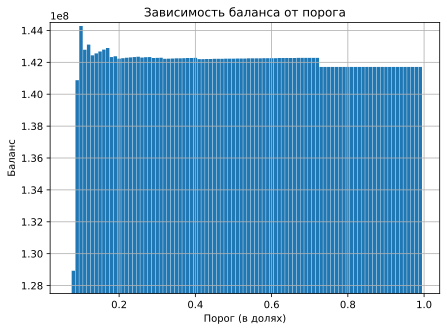

In [390]:
plt.bar(limits, balance, width=0.009)
plt.ylabel("Баланс")
plt.xlabel("Порог (в долях)")
plt.title("Зависимость баланса от порога")
plt.ylim([1.275e8, 1.445e8])
#plt.xticks(limits, size=6, rotation=90)
plt.grid()
plt.show()

In [391]:
max(balance)

144280000

А на каком значение порога это разнциа максимальна?

In [392]:
limits[balance.index(max(balance))]

0.1

Скольким клиентам мы отказали в обслуживании?

In [393]:
pred = (y_pred_proba[:, 1] >= thresholds[(precision >= 0.1)[:-1]][0]).astype(int)

In [394]:
np.sum(pred)

2770

2770 людям откажем в обслуживании.

Это была попытка ручного перебора порогов. Теперь переберем их по thresholds (и это правильно, выше был просто пример, что так можно, но результат будет недостаточно точным!!!!!!!!).

In [395]:
balance = []
limits = []

for t in thresholds:
    pred = (y_pred_proba[:, 1] >= thresholds[(precision >= t)[:-1]][0]).astype(int)
    income = np.sum((pred == 0) & (y_test == 0)) * base_income - np.sum((pred == 0) & (y_test == 1)) * base_expense
    expense = np.sum((pred == 1) & (y_test == 0)) * base_income
    balance.append(income - expense)
    limits.append(t)

In [396]:
balance_max = max(balance)
t_max = limits[balance.index(max(balance))]

In [397]:
print("Баланс максимален при пороге", t_max)

Баланс максимален при пороге 0.09743188841261091


In [398]:
print("Максимальный баланс", balance_max)

Максимальный баланс 144360000


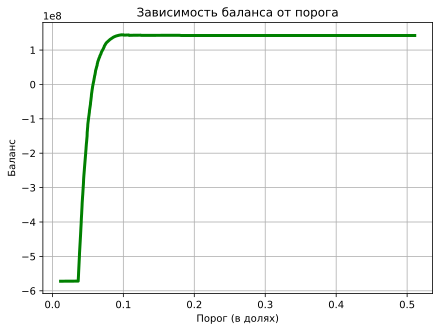

In [401]:
plt.plot(limits, balance, color='green', linewidth=3)
plt.ylabel("Баланс")
plt.xlabel("Порог (в долях)")
plt.title("Зависимость баланса от порога")
plt.grid()
plt.show()

In [402]:
pred = (y_pred_proba[:, 1] >= thresholds[(precision >= t_max)[:-1]][0]).astype(int)

In [403]:
print(np.sum(pred), "людям откажем")

3972 людям откажем


## Часть 5 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

<font color="red"> !!ВНИМАНИЕ!! ХАЛЯВНЫЕ БАЛЛЫ!! ЗАДАНИЕ НА 0.5 БАЛЛА НЕСЛОЖНОЕ И ОЧЕНЬ ПОЛЕЗНОЕ!!</font>

__Задание 13.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- Мы видим, что вы **"поигрались" с vw**, а именно: запуск vw, обучение модели и предсказание ответов на нашем датасете (2-3 попытки обучения с разными параметрами, если не достигли 0.738), изменение значения/включения/выключения 2-3 параметров обучения с описанием того, что они делают. Несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.
- Достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__

In [318]:
import vowpalwabbit

In [312]:
file = pd.read_csv('train-3.csv')

In [315]:
file.head(5)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [325]:
file.columns[2:]

Index(['hour', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [333]:
#from vowpalwabbit.DFtoVW import DFtoVW, SimpleLabel, Namespace, Feature

label = vowpalwabbit.DFtoVW.SimpleLabel(label="hour", weight="C1")
namespaces = [vowpalwabbit.DFtoVW.Namespace(
    features=[vowpalwabbit.DFtoVW.Feature(col) for col in file.columns[2:]], name="i"
),vowpalwabbit.DFtoVW.Namespace(features=vowpalwabbit.DFtoVW.Feature("click"), name="c")]

converter = vowpalwabbit.DFtoVW.DFtoVW(df=file, label=label, namespaces=namespaces)

In [337]:
examples = converter.convert_df()

KeyboardInterrupt: 

In [ ]:
examples

задание вообще не похоже на решаемое  ¯\_(ツ)_/¯ 

задание несложное и

            очень 
        
                полезное
            
сказал мне 

        этот 
        
            ноутбук
            
товарищи!

смотрите на вещи трезво: 

поможете избавить 

        студента 
        
            от мук
            

**Используемые материалы**

https://pythonru.com/baza-znanij/sklearn-roc-auc

https://medium.com/nuances-of-programming/метод-опорных-векторов-примеры-на-python-655455a2fd3b

https://habr.com/ru/post/648753/

https://stackoverflow.com/questions/65385962/how-to-convert-csv-columns-into-vowpal-wabbit-txt-input-file